<a href="https://colab.research.google.com/github/vaibhav-ransing/Property_price_prediction/blob/master/Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


{'Bengaluru_House_Data.csv': b'area_type,availability,location,size,society,total_sqft,bath,balcony,price\r\nSuper built-up  Area,19-Dec,Electronic City Phase II,2 BHK,Coomee ,1056,2,1,39.07\r\nPlot  Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120\r\nBuilt-up  Area,Ready To Move,Uttarahalli,3 BHK,,1440,2,3,62\r\nSuper built-up  Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95\r\nSuper built-up  Area,Ready To Move,Kothanur,2 BHK,,1200,2,1,51\r\nSuper built-up  Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2,1,38\r\nSuper built-up  Area,18-May,Old Airport Road,4 BHK,Jaades ,2732,4,,204\r\nSuper built-up  Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4,,600\r\nSuper built-up  Area,Ready To Move,Marathahalli,3 BHK,,1310,3,1,63.25\r\nPlot  Area,Ready To Move,Gandhi Bazar,6 Bedroom,,1020,6,,370\r\nSuper built-up  Area,18-Feb,Whitefield,3 BHK,,1800,2,2,70\r\nPlot  Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5,3,295\r\nSuper built-up  Area,Rea

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [0]:
####################### Data Cleaning ########################

df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [0]:
df.isnull().any()

area_type       False
availability    False
location         True
size             True
society          True
total_sqft      False
bath             True
balcony          True
price           False
dtype: bool

In [0]:
df.shape

(13320, 9)

In [0]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [0]:
df=df.drop(['area_type','society','balcony','availability'],axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [0]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [0]:
df=df.dropna()
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [0]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [0]:
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [0]:
df =  df.drop(['size'],axis=1)
df.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [0]:
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [0]:
df[df.BHK>20]

,location,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [0]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [0]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [0]:
df[~df['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


In [0]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens)==2:
    return(  (   float(tokens[0])+  float(tokens[1])   )/2)
  try:
    return float(x)
  except:
    return None

In [0]:
print(convert_sqft_to_num('20-30'),convert_sqft_to_num('sqft 330'),convert_sqft_to_num('2000'))

25.0 None 2000.0


In [0]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [0]:
df.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [0]:
df.isna().sum()

location       0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [0]:
df = df.dropna()
df.isna().sum()

location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [0]:
df.shape

(13200, 5)

In [0]:
##################### Feature Engineering ###################

In [0]:
df2 = df.copy()
df2.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [0]:
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']

In [0]:
df2.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [0]:
len(df2['location'].unique()) ######### High Dimensinaality Problem

1298

In [0]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2.groupby('location')['location'].agg('count')
location_stats.sort_values(ascending=False)

########## use df.location.value_counts()

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [0]:
len(location_stats[location_stats<=10])

1047

In [0]:
location_less_10 = location_stats[location_stats<=10]
location_less_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1047, dtype: int64

In [0]:
df2.location = df2.location.apply(lambda x: "others"if x in location_less_10 else x)
len(df2.location.unique())

241

In [0]:
df2.location.value_counts()

others                2872
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Marsur                  11
Narayanapura            11
Tindlu                  11
Pattandur Agrahara      11
Banjara Layout          11
Name: location, Length: 241, dtype: int64

In [0]:
################################# Outliner Removal #############################

In [0]:
df3=df2.copy()
df3.location.value_counts()

others                2872
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Marsur                  11
Narayanapura            11
Tindlu                  11
Pattandur Agrahara      11
Banjara Layout          11
Name: location, Length: 241, dtype: int64

In [0]:
df3[df3.total_sqft/df.BHK<300].head()

,location,total_sqft,bath,price,BHK,price_per_sqft
9,others,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,others,500.0,3.0,100.0,3,20000.000000


In [0]:
df2.shape

(13200, 6)

In [0]:
df3 = df3[~((df.total_sqft)/df.BHK<300)]

In [0]:
df3.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [0]:
df3.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [0]:
def remove_pps_outliner(df):
  df_out = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

In [0]:
df4 = remove_pps_outliner(df3)
df3.shape

(12456, 6)

In [0]:
df4.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [0]:
df4.columns=['location','total_sqft','bath','price','bhk','price_per_sqft']

In [0]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price ,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price, marker ='+',color='green',label='3 BHK',s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('price per Square Feet')
  plt.title(location)
  plt.legend()

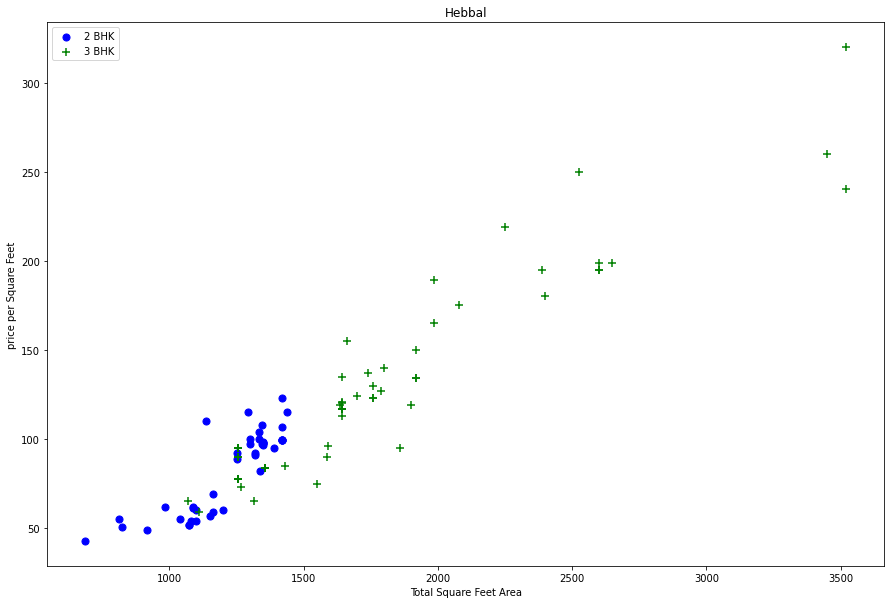

In [0]:
plot_scatter_chart(df4 , 'Hebbal')

In [0]:
def remove_bhk_outliner(df):
  exclude_indices = np.array([])
  for location , location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean': np.mean(bhk_df.price_per_sqft),
          "std": np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk , bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

In [0]:
df5 = remove_bhk_outliner(df4)

In [0]:
print(df4.shape,df5.shape)

(10242, 6) (7317, 6)


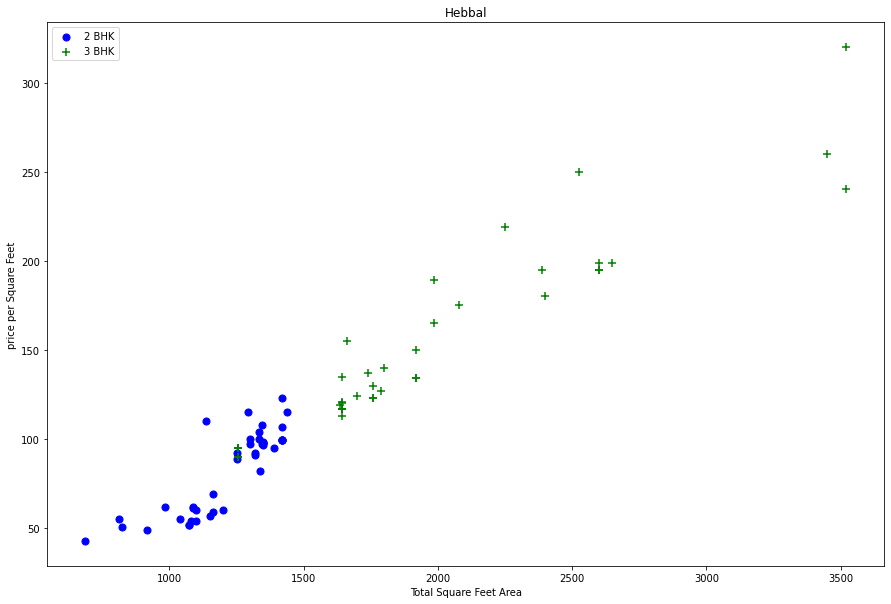

In [0]:
plot_scatter_chart(df5 , 'Hebbal')

Text(0, 0.5, 'Count')

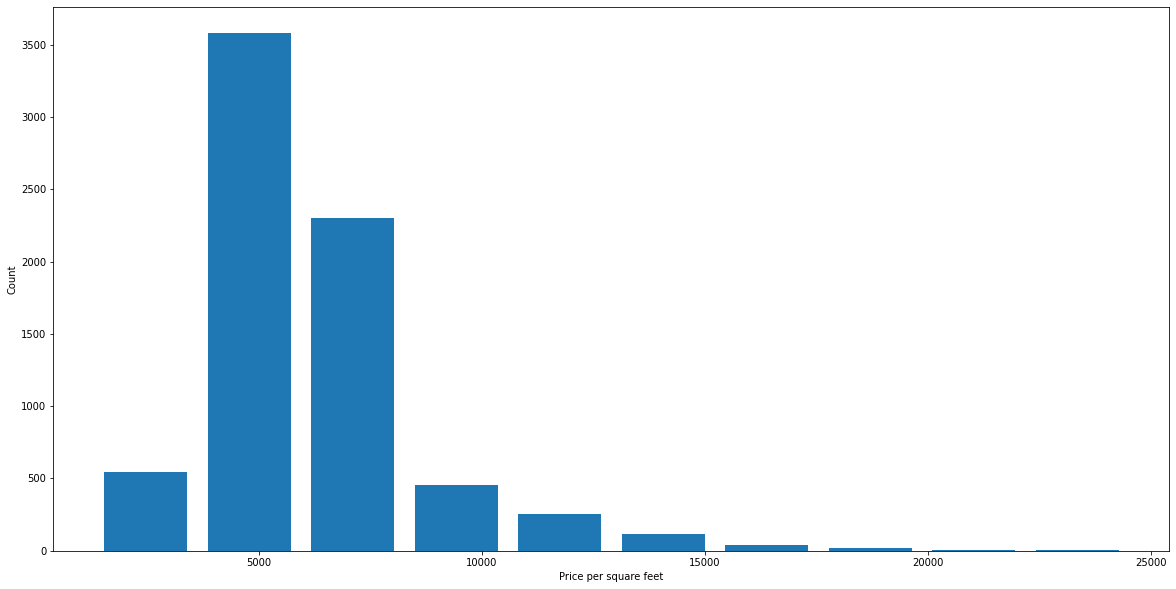

In [0]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

In [0]:
df5.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [0]:
df5[df5.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8483,others,12000.0,12.0,525.0,10,4375.000000
8572,others,10000.0,16.0,550.0,16,5500.000000
9306,others,6000.0,12.0,150.0,11,2500.000000
9637,others,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Counr')

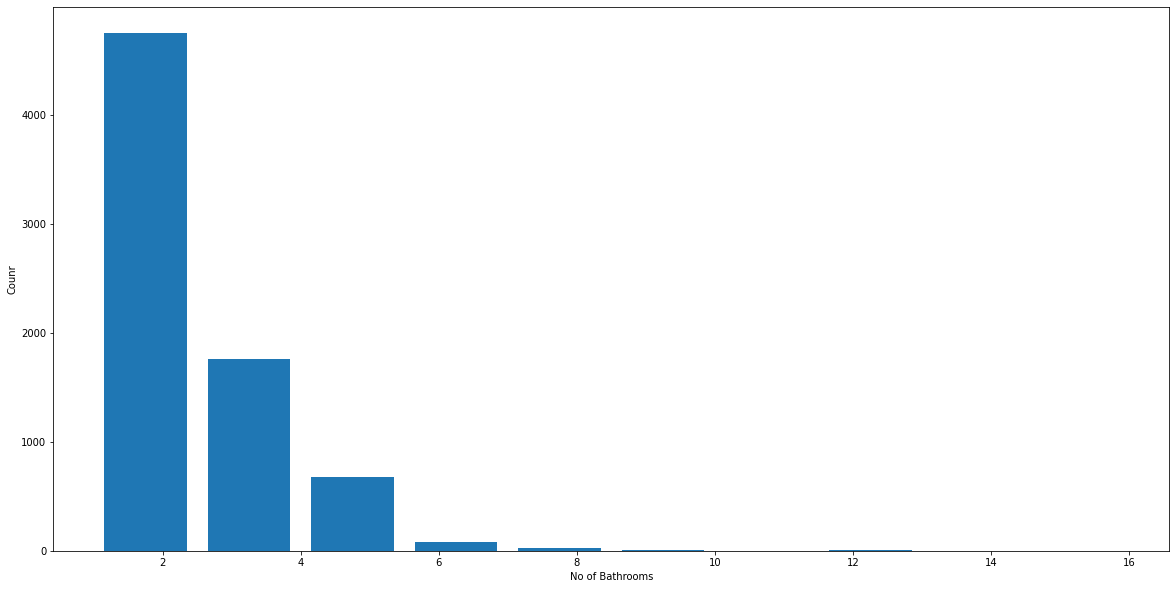

In [0]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel('No of Bathrooms')
plt.ylabel('Counr')

In [0]:
df5[df5.bath>df5.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8408,others,11338.0,9.0,1000.0,6,8819.897689


In [0]:
df6 =df5[df5.bath<df5.bhk+2]
df6.shape

(7239, 6)

In [0]:
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [0]:
dum_loc = pd.get_dummies(df6.location)
dum_loc.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df7 = pd.concat([df6,dum_loc.drop(['others'],axis=1)],axis=1)

In [0]:
df7.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df8 = df7.drop(['location','price_per_sqft'],axis=1)

In [0]:
df8.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x = df8.drop(['price'],axis=1)
x.head(1)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y = df8.price
y.head(1)

0    428.0
Name: price, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
  algo={
      'linear_regression':{
          'model':LinearRegression(),
          'params':{
                  'normalize':[True,False]
          }
      },
      'lasso':{
          'model':Lasso(),
          'params':{
              'alpha':[1,2],
              'selection': ['random','cyclic']
          }
      },
      'decisicion_tree':{
          'model': DecisionTreeRegressor(),
          'params':{
              'splitter': ['best','random']
          }
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for algo_name , config in algo.items():
    gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(x,y)
    scores.append({
        'model':  algo_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726828,"{'alpha': 2, 'selection': 'random'}"
2,decisicion_tree,0.714623,{'splitter': 'best'}


In [0]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model.score(x_test,y_test)

0.8629132245229443

In [0]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [0]:
x = df8.drop(['price'],axis=1)
def predict_price(location,sqft,bath,bhk):
  x = df8.drop(['price'],axis=1)
  loc_index = np.where(x.columns==location)[0][0]

  x = np.zeros(len(x.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  if loc_index>=0:
    x[loc_index]=1
  return model.predict([x])[0]

In [0]:
np.where(x.columns=='1st Phase JP Nagar')[0][0]

4

In [0]:
predict_price('1st Phase JP Nagar',1000,2,2)

83.86570258312139

In [0]:
predict_price('Indira Nagar',1000,2,2)

193.31197733179874

In [0]:
import pickle
with open('banglore_price','wb') as f:
  pickle.dump(model,f)

In [0]:
import json
columns ={
    'data_columns':[col.lower()for col in x.columns]
}
with open('columns_jason','w') as f:
  f.write(json.dumps(columns))

In [0]:
from google.colab import files
files.download('columns_jason')

In [0]:
valid_locations = df8.drop(['total_sqft'	,'bath'	,'price'	,'bhk'],axis=1)

location ='Other' #input("Enter Location = ")
sqft = 1000#int(input("Enter size in square feet = "))
bath = 2#int(input("No. of bath_tubs = "))
bhk = 2#int(input("Size in BHK = "))

try:
  print(predict_price(location,sqft,bath,bhk)*100000)
except:
  print('Enter one out of these locations',valid_locations.head(0))
  

Enter one out of these locations Empty DataFrame
Columns: [1st Block Jayanagar, 1st Phase JP Nagar, 2nd Phase Judicial Layout, 2nd Stage Nagarbhavi, 5th Block Hbr Layout, 5th Phase JP Nagar, 6th Phase JP Nagar, 7th Phase JP Nagar, 8th Phase JP Nagar, 9th Phase JP Nagar, AECS Layout, Abbigere, Akshaya Nagar, Ambalipura, Ambedkar Nagar, Amruthahalli, Anandapura, Ananth Nagar, Anekal, Anjanapura, Ardendale, Arekere, Attibele, BEML Layout, BTM 2nd Stage, BTM Layout, Babusapalaya, Badavala Nagar, Balagere, Banashankari, Banashankari Stage II, Banashankari Stage III, Banashankari Stage V, Banashankari Stage VI, Banaswadi, Banjara Layout, Bannerghatta, Bannerghatta Road, Basavangudi, Basaveshwara Nagar, Battarahalli, Begur, Begur Road, Bellandur, Benson Town, Bharathi Nagar, Bhoganhalli, Billekahalli, Binny Pete, Bisuvanahalli, Bommanahalli, Bommasandra, Bommasandra Industrial Area, Bommenahalli, Brookefield, Budigere, CV Raman Nagar, Chamrajpet, Chandapura, Channasandra, Chikka Tirupathi, Ch